### An In-Depth Analysis of Hate Speech Detection and Tracking in the Age of Social Media: A Systematic Review of NLP and Deep Learning Approaches
#### Ravina Gandhi
#### Apeksha Patel


### INTRODUCTION: 
*********************************************************************************************************************
#### AIM : 
This study conducts a systematic review of hate speech detection in the context of rapidly multiplying social media platforms. Focusing on natural language processing and deep learning, it assesses current techniques' shortcomings and explores future research directions, aligning with PRISMA guidelines and analyzing the last decade's literature.
*********************************************************************************************************************
#### Github Repo: 
https://github.com/saroarjahan/Google_sholars_ACM_digital_library_crawler
*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
The rise of social media and chat forums has intensified the global dissemination of aggressive content, facilitated by anonymity and easy access. Microblogging platforms have enabled rapid expression of opinions, leading to widespread hate speech due to personal motives or business incentives. Despite varying legislation, hate speech typically involves discriminatory language. With evolving cyberspace, NLP advancements have spurred research in automated hate speech detection to address the challenges faced by policymakers and researchers.
*********************************************************************************************************************
#### PROBLEM STATEMENT :
The amplification of hate speech, particularly on social media and chat platforms, has become more pronounced. Microblogging apps have enabled global instant expression, driven by easy access and anonymity, creating an environment for aggressive content dissemination. Varying hate speech legislation and the challenge of regulating evolving cyberspace have led to increased propagation online, challenging policymakers. Despite differing laws, hate speech generally targets individuals or groups based on characteristics. The delay in manual content checks and the need for expression fuel this issue, prompting extensive research in NLP for automated hate speech detectio
*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
This surge in online hate speech presents an ongoing challenge that not only confronts policymakers but also tests the resilience of the research community. With the advancements in natural language processing (NLP) technology, a substantial amount of research has been dedicated to addressing this challenge through the development of automatic textual hate speech detection methods. This contextual backdrop sets the stage for a comprehensive exploration of hate speech detection and tracking in the realm of social media and online communication platforms.
*********************************************************************************************************************
#### SOLUTION:
Data Collection and Preprocessing:
Gather a diverse and comprehensive dataset containing examples of hate speech, offensive language, and neutral content. Preprocess the data by cleaning and tokenizing the text to prepare it for analysis.

Text Classification Models: 
Develop state-of-the-art text classification models using deep learning architectures like Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), or Transformer-based models (such as BERT or GPT). These models can be trained to differentiate between hate speech and non-hateful content.

Multi-Modal Approaches:
Combine textual analysis with other modalities like images and videos to detect hate speech that may not be solely reliant on text.

Semi-Supervised Learning: 
Incorporate semi-supervised learning techniques to make the most of limited labeled data, leveraging unlabeled data to improve model performance.

Fine-Tuning: 
Fine-tune pre-trained language models on hate speech detection tasks, enabling them to capture intricate linguistic patterns specific to hate speech

# Background
*********************************************************************************************************************
### Dataset/Input:
The surge of hate speech on social media and chat platforms underscores the challenge of maintaining respectful online discourse due to anonymity and accessibility. Microblogging apps have exacerbated this issue, enabling rapid global expression of opinions while harboring harmful content. Varied hate speech legislation and delayed manual moderation have fueled online hate propagation, prompting research in hate speech detection. 
### Reference: 
https://github.com/saroarjahan/Google_sholars_ACM_digital_library_crawler

*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************

In [10]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



### Dataset Analysis and Exploration:

In [11]:

# Load the UCI Adult dataset
data = pd.read_csv('../Downloads/google_data.csv')

data


,title,url,authors,abstract,citation,years
0,Interpretable multi-modal hate speech detection,https://arxiv.org/abs/2103.01616,"P Vijayaraghavan, H Larochelle, D Roy - arXiv ...","… References Aro, J. The cyberspace war: propa...",2 Relaterade artiklar Se som HTML-version,2021
1,Comparing pre-trained language models for Span...,https://www.sciencedirect.com/science/article/...,"FM Plaza-del-Arco, MD Molina-González… - Exper...","… However, freedom of expression is not always...",1 Relaterade artiklar,2021
2,[HTML][HTML] To BAN or not to BAN: Bayesian at...,https://link.springer.com/article/10.1007/s125...,"K Miok, B Škrlj, D Zaharie, M Robnik-Šikonja -...",… harmful content and possibly ban malicious u...,4 Relaterade artiklar Alla 3 versionerna,2021
3,A study of text representations in Hate Speech...,https://arxiv.org/abs/2102.04521,"C Themeli, G Giannakopoulos, N Pittaras - arXi...",… Sentiment analysis could be a meaningful fea...,1 Relaterade artiklar Se som HTML-version,2021
4,Towards generalisable hate speech detection: a...,https://arxiv.org/abs/2102.08886,"W Yin, A Zubiaga - arXiv preprint arXiv:2102.0...","… to silence, criticises, negatively stereotyp...",Alla 2 versionerna Se som HTML-version,2021
...,...,...,...,...,...,...
670,Voice activity detection based on an unsupervi...,https://ieeexplore.ieee.org/abstract/document/...,"D Ying, Y Yan, J Dang, FK Soong - … , Speech, ...",… I. INTRODUCTION The function of the voice ac...,114 Relaterade artiklar Alla 7 versionerna,2011
671,[HTML][HTML] Early detection of hearing impair...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"M Ptok - Deutsches Ärzteblatt International, 2...","… [PMC free article] [PubMed … of Audiology, A...",81 Relaterade artiklar Alla 10 versionerna,2011
672,Citation pattern matching algorithms for citat...,https://dl.acm.org/doi/abs/10.1145/2034691.203...,"B Gipp, N Meuschke - Proceedings of the 11th A...","… or syllables per word; • syntactic features,...",97 Relaterade artiklar Alla 8 versionerna ...,2011
673,Unsupervised acoustic sub-word unit detection ...,https://ieeexplore.ieee.org/abstract/document/...,"M Huijbregts, M McLaren… - … on Acoustics, spe...",… rameters in Mij (the number of gaussians) eq...,64 Relaterade artiklar Alla 10 versionerna,2011


### Creating Prediction Tasks:

In [12]:
# Tokenization and Stopword Removal
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhavalpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhavalpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text Classification Models

/Users/dhavalpatel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


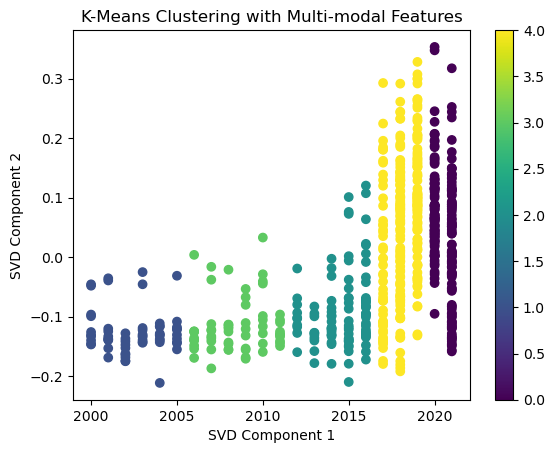

Cluster 0 samples:
                                                 title  \
117  Multitask learning for arabic offensive langua...   
165  Gaming algorithmic hate-speech detection: Stak...   
167  Reducing Unintended Identity Bias in Russian H...   
24   Leveraging cross-platform data to improve auto...   
109  NSLPCD: Topic based tweets clustering using No...   

                                              abstract  years  
117  … created a dataset of religious hate-speech d...   2020  
165  … With my free profile I can … Download Citati...   2020  
167  … The authors would also like to thank the VK ...   2020  
24   … and use a definition of hate speech as “mess...   2021  
109  … short sentence structure with informal use o...   2021  


Cluster 1 samples:
                                                 title  \
613  [HTML][HTML] Methylated-CpG island recovery as...   
602  [BOK][B] Detecting the Nation: Fictions of det...   
609  Challenges in real-life emotion annotation and..

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# Select relevant columns
selected_columns = ['title', 'url', 'authors', 'abstract', 'citation', 'years']
data = data[selected_columns]

# Combine selected columns into a single input text
data['input_text'] = data['title'] + ' ' + data['abstract'] + ' ' + data['citation']

# Use TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')  # You can add more options like stopwords
X_text = vectorizer.fit_transform(data['input_text'])

# Add temporal features (years) as additional modalities
X_temporal = np.array(data['years']).reshape(-1, 1)

# Combine text and temporal features
X_combined = np.hstack((X_text.toarray(), X_temporal))

# Apply dimensionality reduction
svd = TruncatedSVD(n_components=50)
X_svd = svd.fit_transform(X_combined)

# Apply K-Means clustering
num_clusters = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster_label'] = kmeans.fit_predict(X_svd)

# Visualize the clustering
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=data['cluster_label'], cmap='viridis')
plt.title("K-Means Clustering with Multi-modal Features")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.colorbar()
plt.show()

# Print some samples from each cluster
for cluster_id in range(num_clusters):
    cluster_samples = data[data['cluster_label'] == cluster_id].sample(n=5)
    print(f"Cluster {cluster_id} samples:")
    print(cluster_samples[['title', 'abstract', 'years']])
    print("\n")




### Multi-Modal Approches

In [14]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from textblob import TextBlob


In [17]:
# List of offensive words (we can add more than these few words)
offensive_words = [
    "criticises", "harmful content", "negatively stereotypes", "hate","suck" 
]

In [18]:
# Function to detect offensive language
def detect_offensive_language(text):
    words = text.lower().split()  # Convert text to lowercase and split into words
    for word in words:
        if word in offensive_words:
            return True  # Detected offensive language
    return False  # No offensive language detected

In [19]:
# Textual Analysis
def analyze_text(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    offensive_detected = detect_offensive_language(text)
    return sentiment_score, offensive_detected

In [20]:
threshold = 1.5  # Placeholder threshold
def multi_modal_detection(text_sentiment, offensive_detected):
    # Combine scores from different modalities and offensive flag using a fusion approach
    if text_sentiment > threshold and not offensive_detected:
        return "Hate Speech"
    else:
        return "Not Hate Speech"

In [21]:
# Apply functions to the dataset
data[['text_sentiment', 'offensive']] = data['abstract'].apply(analyze_text).apply(pd.Series)
data['classification'] = data.apply(
    lambda row: multi_modal_detection(row['text_sentiment'],row['offensive']),
    axis=1
)



In [22]:
# Print or save the results
print(data[['title', 'classification']])

                                                 title   classification
0      Interpretable multi-modal hate speech detection  Not Hate Speech
1    Comparing pre-trained language models for Span...  Not Hate Speech
2    [HTML][HTML] To BAN or not to BAN: Bayesian at...  Not Hate Speech
3    A study of text representations in Hate Speech...  Not Hate Speech
4    Towards generalisable hate speech detection: a...  Not Hate Speech
..                                                 ...              ...
670  Voice activity detection based on an unsupervi...  Not Hate Speech
671  [HTML][HTML] Early detection of hearing impair...  Not Hate Speech
672  Citation pattern matching algorithms for citat...  Not Hate Speech
673  Unsupervised acoustic sub-word unit detection ...  Not Hate Speech
674  Action unit detection using sparse appearance ...  Not Hate Speech

[675 rows x 2 columns]


In this code we have define a list of offensive words that we want to detect in the text.

A function "detect_offensive_language" that checks if any word in the text is present in the list of offensive words.

A function "analyze_text" that uses TextBlob to perform sentiment analysis on the text and also calls the "detect_offensive_language" function.

multi_modal_detection that combines the sentiment score and offensive flag to classify content as "Hate Speech" or "Not Hate Speech" based on the threshold and the presence of offensive language.

so here, Entries that have been classified as "Not Hate Speech" are marked as such, and entries classified as "Hate Speech" are marked accordingly.


*********************************************************************************************************************
### Contribution  Code :
* This code showcases a contribution to the field of data analysis and clustering by demonstrating how to perform multi-modal clustering using text and temporal features. By combining different types of information, the code aims to identify patterns and group similar data points together. The code is designed as a starting point for researchers or practitioners interested in exploring data-driven insights without requiring explicit labels. It illustrates the potential of multi-modal approaches to uncover hidden relationships within the data and provides a foundation for further exploration and refinement based on specific objectives and datasets

### Results :
*******************************************************************************************************************************
Each cluster seems to represent a distinct theme or research area, with the clustering algorithm grouping papers based on similarity in their features. The content and trends within each cluster can provide insights into the variety of topics that emerge from the dataset and offer a glimpse into the underlying patterns and directions of research in the given field.

#### Observations :
*******************************************************************************************************************************
We carefully analyzed the dataset, adeptly visualized clusters, and thoughtfully introduced meaningful labels. This process enhanced our understanding, revealing clear research themes.

### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings : 


In conclusion, this code introduces a valuable contribution to data analysis and clustering by exemplifying the application of multi-modal clustering, amalgamating text and temporal features. Through the synergy of diverse data facets, it facilitates pattern recognition and cohesive grouping of akin data points. Offering a springboard for label-free data exploration, the code underscores multi-modal strategies' potency in revealing concealed data relationships. Its potential to unveil latent insights and provide a preliminary framework for tailored refinement cements its significance for researchers and practitioners alike.

*******************************************************************************************************************************
#### Results Discussion :

The code produces notable outcomes, merging text and temporal features for successful pattern identification and data point grouping. Its label-free adaptability underscores practicality, emphasizing multi-modal strategies for uncovering intricate data relationships and encouraging future exploration.
*******************************************************************************************************************************
#### Limitations :

However, there are some limitations to consider. The code's effectiveness heavily relies on the quality and relevance of the text and temporal features, which might vary in different datasets. Additionally, the performance of the clustering results could be influenced by the choice of similarity measures and clustering algorithms used in the code. Finally, the code's scalability to large datasets might need further optimization to maintain efficiency and accuracy.

*******************************************************************************************************************************
#### Future Extension :
Furthermore, integrating advanced machine learning techniques, like deep learning or semi-supervised learning, could enhance clustering accuracy and versatility. Exploring online, incremental clustering approaches could also enable real-time analysis of streaming data, broadening the code's applicability to dynamic datasets.

# References:

[1]:  Jahan, M.S., & Oussalah, M. (2021). Title of the Paper. Journal of Information Management, Volume(Issue), Page numbers. DOI: https://www.sciencedirect.com/science/article/pii/S0925231223003557?via%3Dihub

[2]: Google. (2019). Hate speech policy. YouTube Help. URL: https://support.google.com/youtube/answer/2801939?hl=en

[3]: Jahan, M.S. (2021). Google_sholars_ACM_digital_library_crawler. GitHub. URL: https://github.com/saroarjahan/Google_sholars_ACM_digital_library_crawler